Import bibliotek

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
import time


wczytanie zdjecia

Yoda image:


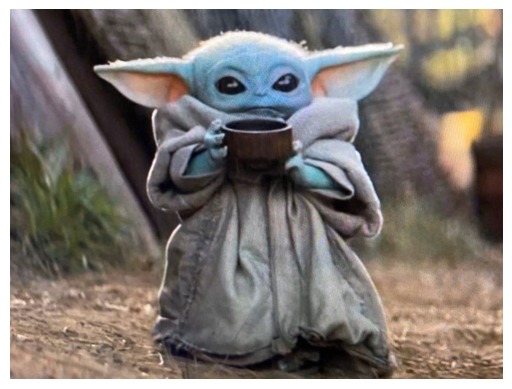

In [2]:
im = Image.open('yoda.jpeg')
print("Yoda image:")
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.show()

processing zdjecia

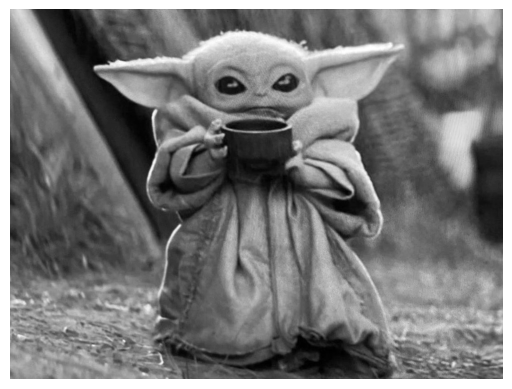

In [3]:
im = im.convert('L')
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.show()

In [4]:
yoda_matrix = np.array(im)
yoda_matrix.shape

(900, 1200)

In [5]:
print("min:",yoda_matrix.min()) # min 0 -> czarny
print("max:",yoda_matrix.max()) # max 255 -> bialy

min: 0
max: 255


In [6]:
yoda_matrix

array([[187, 187, 187, ..., 124, 121, 114],
       [187, 187, 187, ..., 124, 122, 116],
       [187, 187, 188, ..., 125, 123, 118],
       ...,
       [140, 140, 139, ..., 101,  98,  95],
       [144, 144, 142, ..., 103, 103, 102],
       [145, 145, 144, ..., 107, 110, 111]], dtype=uint8)

single thresholding

In [7]:
threshold = 128
yoda_matrix_test = np.where(yoda_matrix < threshold, 0, 255) # Fastest way

In [8]:
np.array_equal(yoda_matrix, yoda_matrix_test)
yoda_matrix_test

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0]])

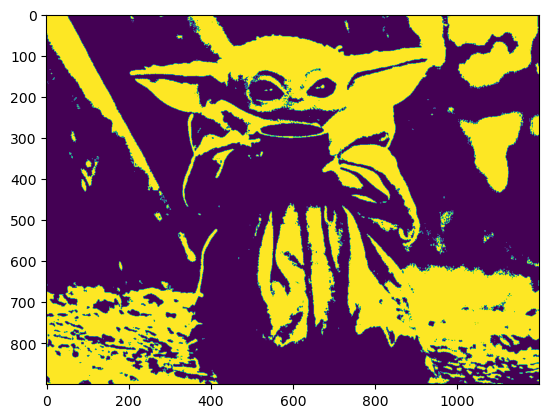

In [9]:
plt.imshow(yoda_matrix_test) # Domyslna kolorystyka matplotliba = zolto/fioletowy, jako czarno/bialy 
# https://www.reddit.com/r/matplotlib/comments/h9bdx0/opencv_grayscale_image_turns_purple_and_yellow/

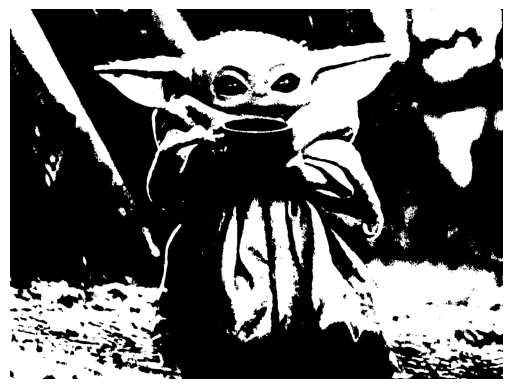

In [10]:
plt.imshow(yoda_matrix_test, cmap='gray')
plt.axis('off')
plt.show()

single threshold 2nd way

In [11]:
yoda_matrix_test_2 = np.array(yoda_matrix)

threshold = 128
height, width = yoda_matrix_test_2.shape

for i in range(height):
    for j in range(width):
        if yoda_matrix_test_2[i][j] < threshold:
            yoda_matrix_test_2[i][j] = 0
        else:
            yoda_matrix_test_2[i][j] = 255

yoda_matrix_test_2

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0]], dtype=uint8)

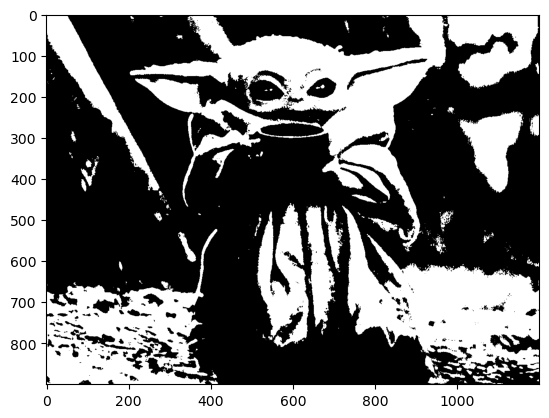

In [12]:
plt.imshow(yoda_matrix_test_2, cmap='gray') # -> tak samo

In [13]:
np.array_equal(yoda_matrix_test, yoda_matrix_test_2) # Takie same = )

True

double thresholding, using gray color

In [14]:
yoda_matrix_test_3 = np.array(yoda_matrix)

yoda_matrix_test_31 = yoda_matrix_test_3.copy() # test for loop
yoda_matrix_test_32 = yoda_matrix_test_3.copy() # test np.where

low, high = 90, 180


In [15]:
start = time.time()

for i in range(height):
    for j in range(width):
        if yoda_matrix_test_31[i][j] < low:
            yoda_matrix_test_31[i][j] = 0
        elif yoda_matrix_test_31[i][j] < high:
            yoda_matrix_test_31[i][j] = 127
        else:
            yoda_matrix_test_31[i][j] = 255 

end = time.time()
print(f"{(end - start):.5f} s")

1.54924 s


In [16]:
start = time.time()

yoda_matrix_test_3 = np.where(yoda_matrix_test_32 < low, 0, np.where(yoda_matrix_test_32 < high, 127, 255))

end = time.time()
print(f"{(end - start):.5f} s")

0.00220 s


In [17]:
np.array_equal(yoda_matrix_test_31, yoda_matrix_test_32) # The same

False

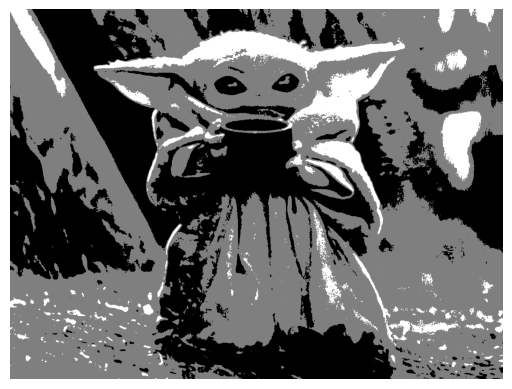

In [18]:
plt.imshow(yoda_matrix_test_31, cmap='gray')
plt.axis('off')
plt.show()

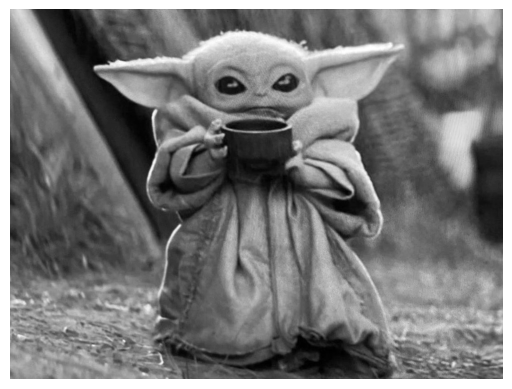

In [19]:
plt.imshow(yoda_matrix_test_32, cmap='gray')
plt.axis('off')
plt.show()

Histogram equalization

In [20]:
# https://stackoverflow.com/questions/28663856/how-do-i-count-the-occurrence-of-a-certain-item-in-an-ndarray
unique, counts = np.unique(yoda_matrix, return_counts=True)
distribution = dict(zip(unique, counts))
distribution

{0: 80,
 1: 557,
 2: 887,
 3: 1041,
 4: 1622,
 5: 1897,
 6: 1704,
 7: 1904,
 8: 1965,
 9: 2216,
 10: 2386,
 11: 2480,
 12: 2392,
 13: 2240,
 14: 2572,
 15: 2492,
 16: 2353,
 17: 2463,
 18: 2346,
 19: 2412,
 20: 2540,
 21: 2505,
 22: 2725,
 23: 3043,
 24: 3072,
 25: 3198,
 26: 3267,
 27: 3409,
 28: 3529,
 29: 3608,
 30: 3581,
 31: 3622,
 32: 3493,
 33: 3553,
 34: 3470,
 35: 3783,
 36: 4047,
 37: 4476,
 38: 4409,
 39: 4673,
 40: 4370,
 41: 4034,
 42: 3699,
 43: 3443,
 44: 3177,
 45: 2959,
 46: 2930,
 47: 2888,
 48: 2726,
 49: 2787,
 50: 2641,
 51: 2713,
 52: 2799,
 53: 2871,
 54: 2967,
 55: 3063,
 56: 3259,
 57: 3383,
 58: 3544,
 59: 3799,
 60: 3904,
 61: 4374,
 62: 4675,
 63: 5198,
 64: 5277,
 65: 5765,
 66: 6086,
 67: 6236,
 68: 6550,
 69: 6700,
 70: 6763,
 71: 6748,
 72: 7033,
 73: 6990,
 74: 7276,
 75: 7219,
 76: 7505,
 77: 7536,
 78: 7388,
 79: 7384,
 80: 7638,
 81: 7613,
 82: 7539,
 83: 7883,
 84: 8029,
 85: 8366,
 86: 8463,
 87: 8811,
 88: 9130,
 89: 9080,
 90: 9166,
 91: 9154,
 9

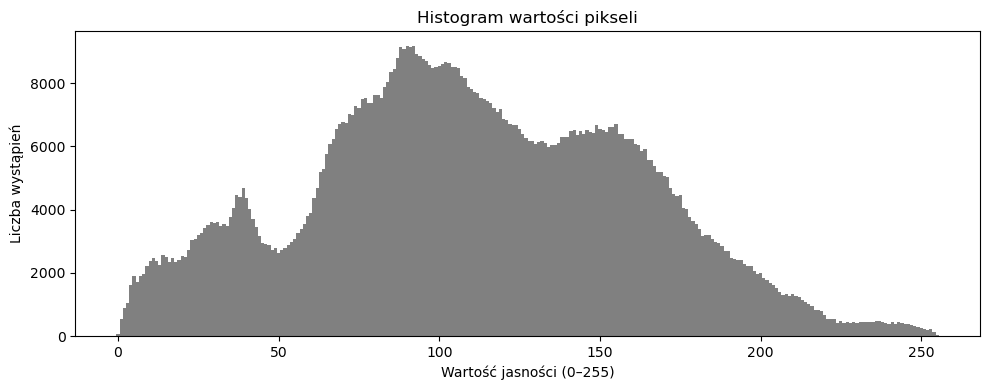

In [21]:
# Jeśli wartości nie są kompletne, to uzupełnij brakujące do 256
full_histogram = [distribution.get(i, 0) for i in range(256)]

# Rysowanie histogramu
plt.figure(figsize=(10, 4))
plt.bar(range(256), full_histogram, width=1.0, color='gray')
plt.title('Histogram wartości pikseli')
plt.xlabel('Wartość jasności (0–255)')
plt.ylabel('Liczba wystąpień')
plt.tight_layout()
plt.show()

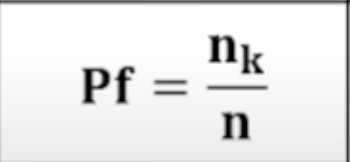

In [22]:
# https://www.youtube.com/watch?v=bQ1syT8X0oA

n = yoda_matrix.size # calkowita ilosc pikseli

# minimum = yoda_matrix.min()
# maximum = yoda_matrix.max()
# pix_range = maximum - minimum

pf = [] 
for i in range(256):
    pf.append(distribution.get(i, 0) / n)

cdf = [pf[0]]
for i in range(1, 256, 1):
    cdf.append(cdf[i - 1] + pf[i])

L = 256
mapping = [round((L - 1) * cdf[i]) for i in range(256)]

In [23]:
from collections import defaultdict

scaled_distribution = defaultdict(int)
for gray_level, count in distribution.items():
    new_gray_level = mapping[gray_level]
    scaled_distribution[new_gray_level] += count

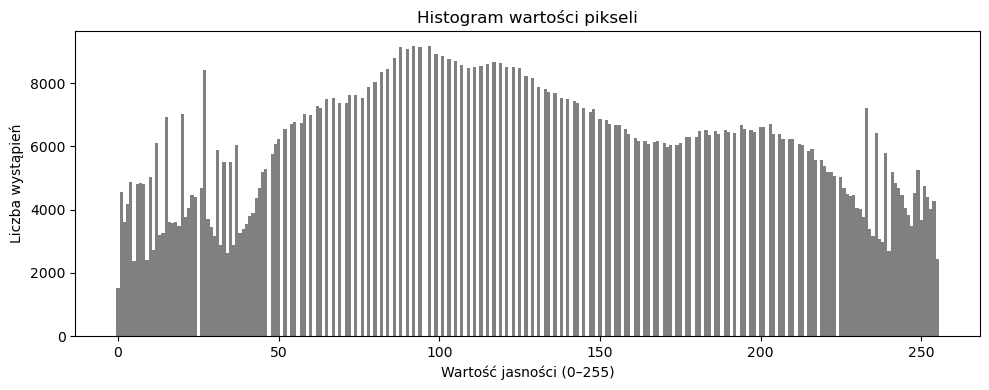

In [24]:
# Jeśli wartości nie są kompletne, to uzupełnij brakujące do 256
full_histogram = [scaled_distribution.get(i, 0) for i in range(256)]

# Rysowanie histogramu
plt.figure(figsize=(10, 4))
plt.bar(range(256), full_histogram, width=1.0, color='gray')
plt.title('Histogram wartości pikseli')
plt.xlabel('Wartość jasności (0–255)')
plt.ylabel('Liczba wystąpień')
plt.tight_layout()
plt.show()

testing the histogram equalization

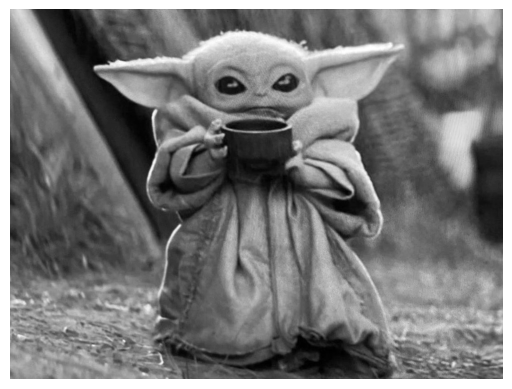

In [25]:
yodamatrix_test_41 = yoda_matrix.copy() # Base photo

for i in range(height):
    for j in range(width):
        yodamatrix_test_41[i][j] = mapping[yodamatrix_test_41[i][j]]

# Before
plt.imshow(yoda_matrix, cmap='gray')
plt.axis('off')
plt.show()

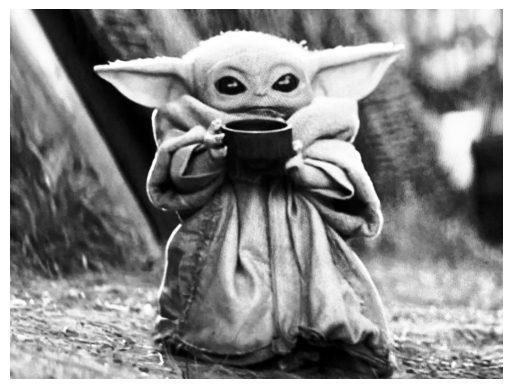

In [26]:
# After
plt.imshow(yodamatrix_test_41, cmap='gray')
plt.axis('off')
plt.show()

In [27]:
yoda_matrix[0][0]
mapping[239]

254

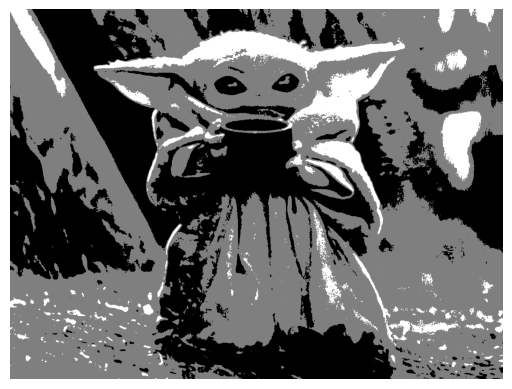

In [28]:
# Testing on processed image

yodamatrix_test_42 = yoda_matrix_test_31.copy() # Base photo

for i in range(height):
    for j in range(width):
        yodamatrix_test_42[i][j] = mapping[yodamatrix_test_42[i][j]]

# Before
plt.imshow(yoda_matrix_test_31, cmap='gray')
plt.axis('off')
plt.show()

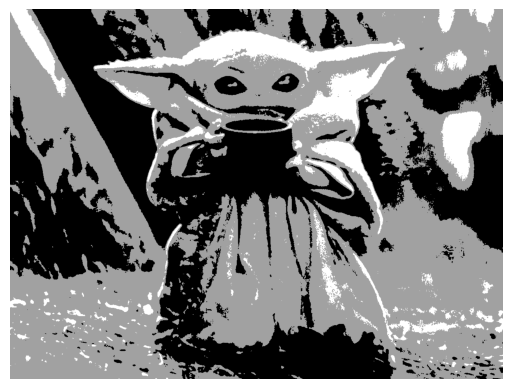

In [29]:
# After
plt.imshow(yodamatrix_test_42, cmap='gray')
plt.axis('off')
plt.show()

In [30]:
np.array_equal(yoda_matrix, yodamatrix_test_41)

False

filtering

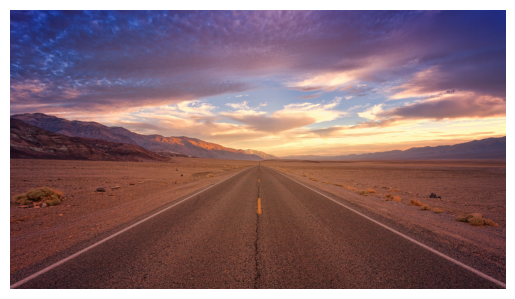

In [31]:
im_2 = Image.open('road.jpg')

plt.imshow(im_2, cmap='gray')
plt.axis('off')
plt.show()

Mtrix dim: (2421, 4303)


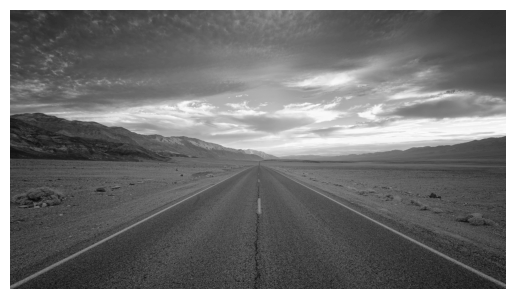

In [32]:
im_2 = im_2.convert("L") # B/W
road_matrix = np.array(im_2)
print("Mtrix dim:", road_matrix.shape)
plt.imshow(im_2, cmap='gray')
plt.axis('off')
plt.show()

In [39]:
def check(tuple, dictionary):
    if any(x < 0 for x in tuple):
        return 0
    return dictionary[tuple]

# def map_area_sum(tab = np.array):
#     tab_mapped = np.zeros_like(tab)

#     height, width = tab.shape

#     for i in range(height): # O(n)
#         for j in range(width): # O(n)
#             tab_mapped[i][j] = tab[0:i+1, 0:j+1].sum() # O(n^2) -> slow

#     return tab_mapped

def map_area_sum(tab = np.array):
    sat = tab.cumsum(axis=0).cumsum(axis=1)
    return sat

def mean_filter(tab, mask):
    if mask % 2 == 0:
        raise ValueError("Maska musi byc nieparzysta")
    
    filtered_tab = np.zeros_like(tab)

    x = map_area_sum(tab)
    height, width = tab.shape
    k = mask // 2

    for i in range(height):
        for j in range(width):
            P = (min(i + k, height - 1), min(j+k, width - 1) )
            Q = (i - k - 1, min(j + k, width - 1))
            S = (min(i + k, height - 1), j - k - 1)
            R = (i - k - 1, j - k - 1)

            summed_area = int((x[P] - check(Q, x) - check(S, x) + check(R, x)) / (mask**2))
            filtered_tab[i][j] = summed_area

    return filtered_tab


/var/folders/4g/5v3gx6nx2ml_1gtsc_n5xnjc0000gn/T/ipykernel_5815/59848250.py:38: RuntimeWarning: overflow encountered in scalar subtract
  summed_area = int((x[P] - check(Q, x) - check(S, x) + check(R, x)) / (mask**2))
/var/folders/4g/5v3gx6nx2ml_1gtsc_n5xnjc0000gn/T/ipykernel_5815/59848250.py:38: RuntimeWarning: overflow encountered in scalar add
  summed_area = int((x[P] - check(Q, x) - check(S, x) + check(R, x)) / (mask**2))


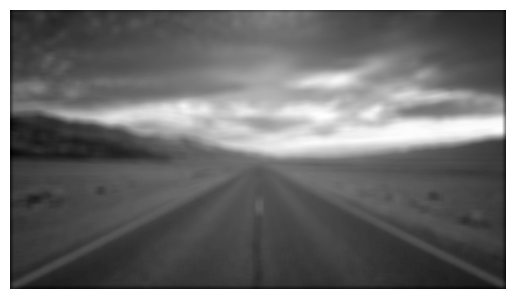

In [40]:
output = mean_filter(road_matrix, 71)

plt.imshow(output, cmap='gray')
plt.axis('off')
plt.show()